#### This is a test implementation using ImageAI framework for object detection copied from the link below
https://www.kaggle.com/shivamb/objects-bounding-boxes-using-resnet50-imageai

#### As this framework doesn't support fine tuning for customized object list that not included in the baseline model yet, <br> it's not suitable for the competition purpose.

In [88]:
import os, math
import pandas as pd 
import numpy as np
import csv
import random

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
from imageai.Detection import ObjectDetection

%matplotlib inline

In [89]:
# The image path must contain a folder which contains the images...
# So image_path = "../input/open-images-2019-object-detection/test/" doesn't work
image_path = "../input/open-images-2019-object-detection/"
#ImageDataGenerator document: https://keras.io/preprocessing/image/
img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = 10)
filenames = img_generator.filenames

Found 99999 images belonging to 1 classes.


In [90]:
model_weight_path = "../input/resnet50/yolo.h5"
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_weight_path)
detector.loadModel()

ImageAi Detection source code: https://github.com/OlafenwaMoses/ImageAI/blob/master/build/lib/imageai/Detection/__init__.py
<br>object detection example: https://github.com/OlafenwaMoses/ImageAI/blob/master/examples/object_detection.py

In [92]:
import time
random.shuffle(filenames)
output_path = "../output/ImageAI_output/"
start_time = time.time()
with open('../output/ImageAI_output/prediction.csv', 'w+', newline='') as f:
    table_writer = csv.writer(f)
    for i in range(200):
        object_recs = ""
        detections = detector.detectObjectsFromImage(image_path + filenames[i], 
                                                     output_image_path=os.path.join(output_path, f"output_images/#{i}_output.jpg"),
                                                     minimum_percentage_probability=50)
        for eachObject in detections:
            object_rec = ' '.join([str(val) for val in eachObject.values()])
            object_recs += ' ' + object_rec
        if i % 40 == 0:
            print(f"{object_recs}\n")
        table_writer.writerow([f"#{i}_image", object_recs.strip()])
print(f"Spent time:{time.time() - start_time:.3} seconds")

 tie 54.598355293273926 (877, 92, 889, 129) tie 55.27826547622681 (443, 274, 475, 341) tie 63.87521028518677 (540, 149, 548, 185) person 53.7797212600708 (528, 101, 595, 219) person 56.739574670791626 (693, 82, 757, 237) person 59.41961407661438 (603, 98, 641, 180) person 59.46246385574341 (753, 78, 800, 186) person 60.79152226448059 (200, 107, 249, 211) person 70.30828595161438 (105, 66, 932, 264) person 70.7646369934082 (803, 70, 871, 273) person 75.18489360809326 (69, 109, 117, 286) person 77.91720032691956 (301, 99, 357, 216) person 80.80108761787415 (111, 123, 165, 294) person 83.48286747932434 (859, 41, 931, 202) person 85.65133810043335 (524, 222, 591, 507) person 97.49273657798767 (40, 237, 103, 464) person 98.87913465499878 (818, 231, 925, 541) person 99.46076273918152 (694, 181, 815, 620) person 99.6911883354187 (219, 200, 321, 602) person 99.79708790779114 (305, 208, 431, 617) person 99.82388615608215 (142, 212, 235, 599) person 99.92794990539551 (553, 196, 687, 675) person 

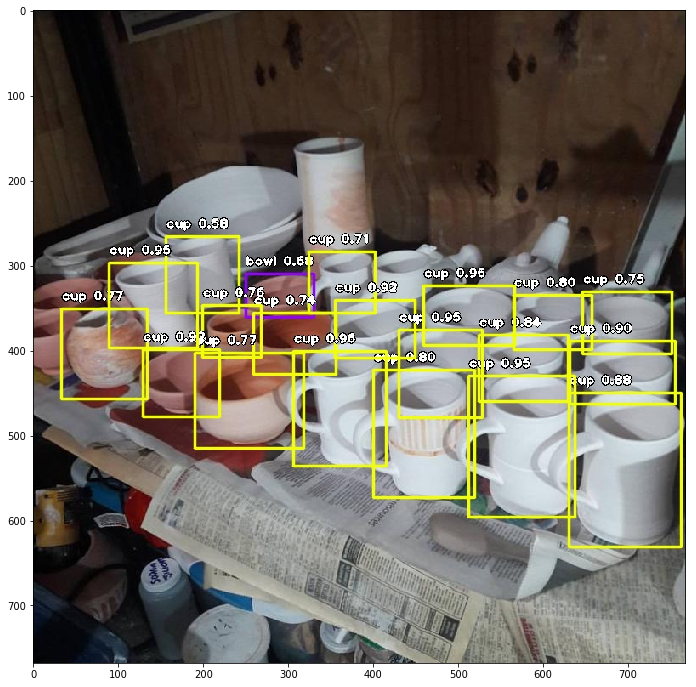

In [83]:
plt.figure(figsize=(12,12))
plt.imshow(plt.imread(output_path + "output_images/#3_output.jpg"))
plt.show()

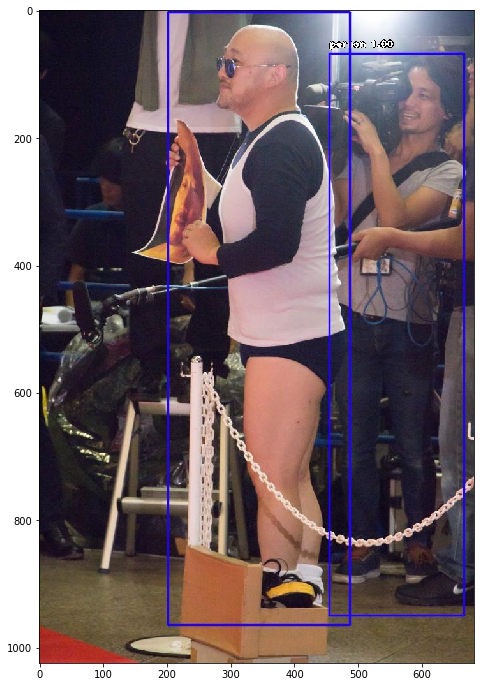

In [85]:
plt.figure(figsize=(12,12))
plt.imshow(plt.imread(output_path + "output_images/#8_output.jpg"))
plt.show()

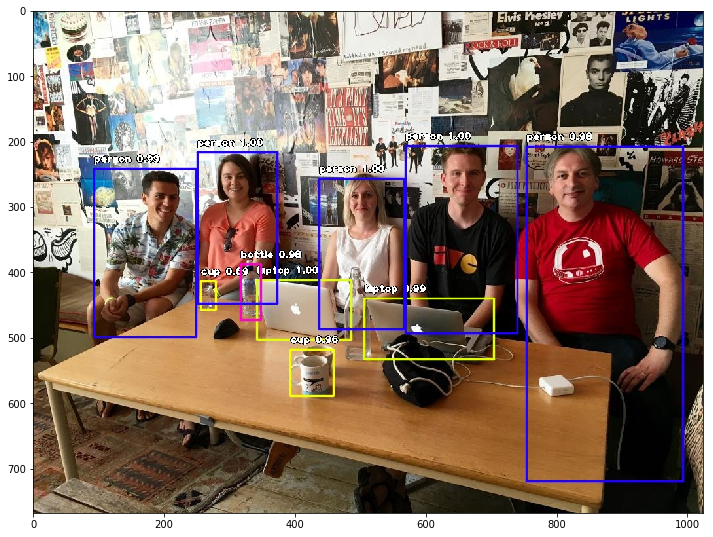

In [87]:
plt.figure(figsize=(12,12))
plt.imshow(plt.imread(output_path + "output_images/#27_output.jpg"))
plt.show()